# Modeling HIV
### Devin Etcitty
### Crystal Tanaka

In [7]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
##Using Python 3.5

## Simple HIV Model

$ P $ = Production of Virus

$ c $ = clearing constant

$ V $ = Virus concentration

$$ \frac{dV}{dt} = P - cV$$

In [30]:


def simpleHIV(F_v, t):
    
    P = .01
    c = .02
    
    dV = P - F_v[0] * c
    
    return [dV]


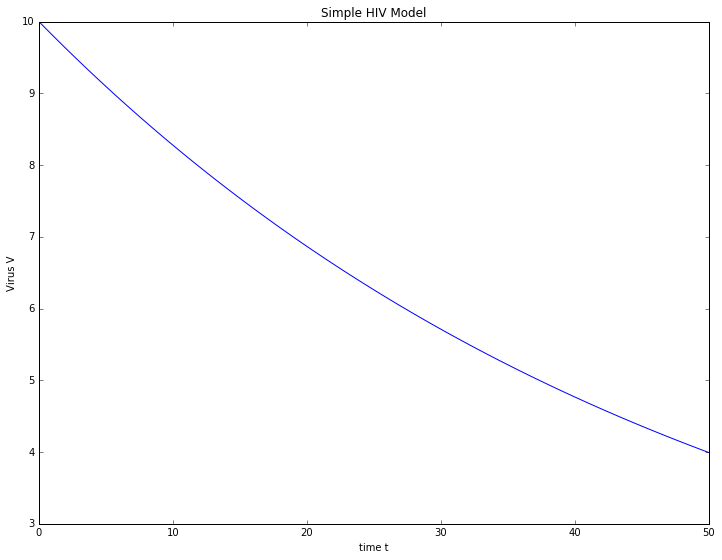

In [40]:
t0 = [10]
t = np.linspace(0, 50, 100)
y = odeint(simpleHIV, t0, t)

plt.figure(num=None, figsize=(12, 9), dpi=100, facecolor='w', edgecolor='k')
plt.plot(t, y[:, 0], 'b-')
plt.xlabel('time t')
plt.ylabel('Virus V')
plt.title('Simple HIV Model')

Experimental Values given in Parelson et al. (Dynamics of HIV Infection of DC4+ T Cells, 1992)


In [10]:
s = 10
p = 0.03
tMax =  1500
dT = 0.04

## CD4+ T Cell Population

Taken from Parelson et al. (Mathematical Analysis of HIV-1 Dynamics in Vivo, 1999)

$ T $ = concentration of uninfected CD4+ T Cells


$$ \frac{dT}{dt} = s + pT (1 - \frac{T}{T_{max}}) - d_T T $$



In [11]:
def viralProd(T, t):
    Dt = s + p*T[0] *(1 - T[0] / tMax) - dT * T[0]
    
    return [Dt]



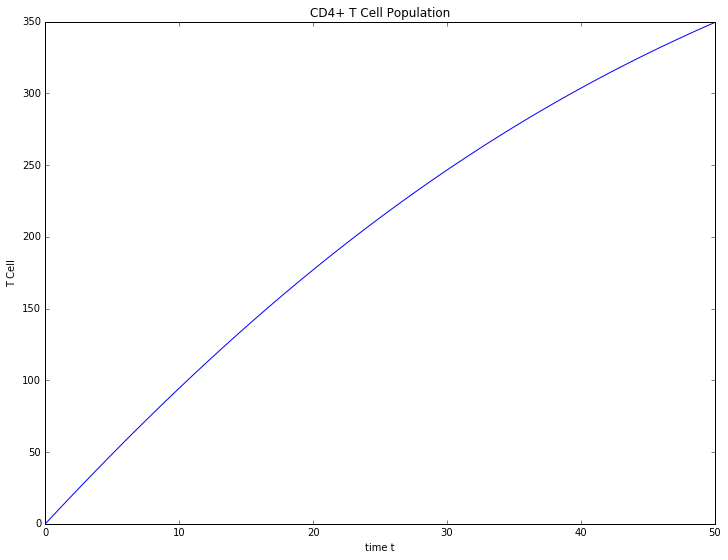

In [41]:
t0 = [0]
t = np.linspace(0, 50, 100)
y = odeint(viralProd, t0, t)

plt.figure(num=None, figsize=(12, 9), dpi=100, facecolor='w', edgecolor='k')

plt.plot(t, y, 'b-')
plt.xlabel('time t')
plt.ylabel('T Cell')
plt.title('CD4+ T Cell Population')

## Drug Therapy Model

Taken from Parelson et al. (Dynamics of HIV Infection of DC4+ T Cells, 1992)

$ T $ = concentration of uninfected CD4+ T Cells

$ T^* $ = concentration of infected CD4+ T cells

$ V $ = concentration of HIV virus

$$ \frac{dT}{dt} = s + pT (1 - \frac{T}{T_{max}}) - d_T T -kVT$$

$$ \frac{dT^*}{dt} = kV T - \delta T^*$$

$$ \frac{dV}{dt} = N \delta T^* - cV$$


Experimental Values given in Parelson et al.

In [13]:
s = 10
p = 0.03
tMax =  1500
dT = 0.04

k = 2.4* math.pow(10, -5)
delta = 0.24
N = 3
c = 2.4 


### Ode Function

In [14]:
def hivThree(T, t):
    Dt = s + p*T[0] *(1 - T[0] / tMax) - dT * T[0] - k * T[2] * T[1]
    Dt_star = k * T[2]*T[0] - delta * T[1]
    Dv = N * delta * T[1] - c * T[0]
    
    return [Dt, Dt_star, Dv]


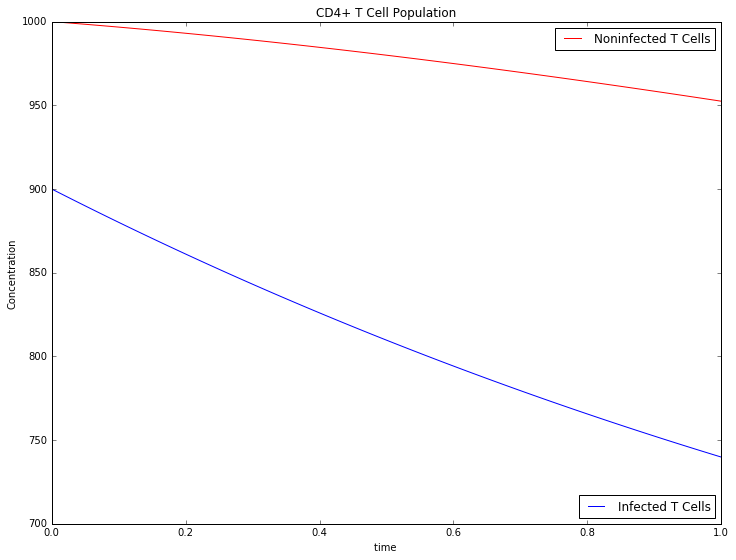

In [47]:
t0 = [1000,900,500]
t = np.linspace(0, 1.00, 100)
y = odeint(hivThree, t0, t)


plt.figure(num=None, figsize=(12, 9), dpi=100, facecolor='w', edgecolor='k')

line1, = plt.plot(t, y[:, 1], 'b-', label='Infected T Cells')
line2, = plt.plot(t, y[:, 0], 'r-', label='Noninfected T Cells')

first_legend = plt.legend(handles=[line1], loc=4)
ax = plt.gca().add_artist(first_legend)
plt.legend(handles=[line2], loc=1)
plt.xlabel('time ')
plt.ylabel('Concentration')
plt.title('CD4+ T Cell Population')

## Perfect Inhibator k=0

Taken from Parelson et al. (Dynamics of HIV Infection of DC4+ T Cells, 1992)

$ T $ = concentration of uninfected CD4+ T Cells

$ T^* $ = concentration of infected CD4+ T cells

$ V $ = concentration of HIV virus

$$ \frac{dT}{dt} = s + pT (1 - \frac{T}{T_{max}}) - d_T T $$

$$ \frac{dT^*}{dt} = - \delta T^*$$

$$ \frac{dV}{dt} = N \delta T^* - cV$$

In [16]:
s = 10
p = 0.03
tMax =  1500
dT = 0.04

k = 0
delta = 0.24
N = 3
c = 2.4 

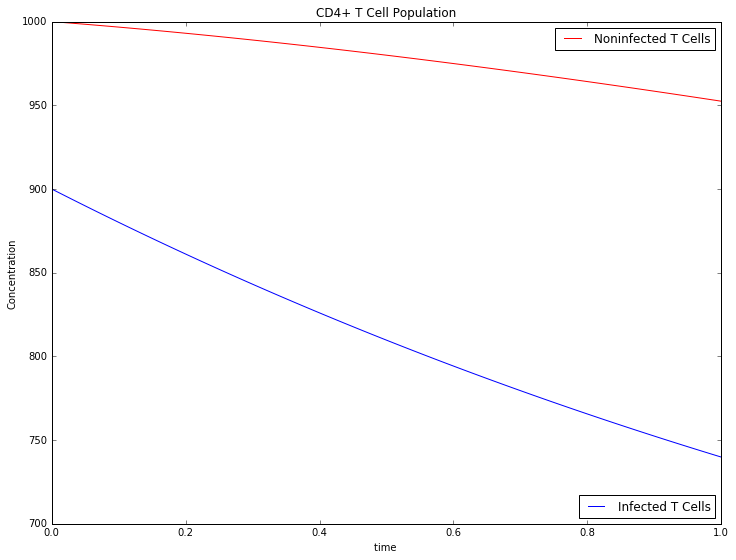

In [48]:
t0 = [1000,900,500]
t = np.linspace(0, 1.00, 100)
y = odeint(hivThree, t0, t)



plt.figure(num=None, figsize=(12, 9), dpi=100, facecolor='w', edgecolor='k')

line1, = plt.plot(t, y[:, 1], 'b-', label='Infected T Cells')
line2, = plt.plot(t, y[:, 0], 'r-', label='Noninfected T Cells')

first_legend = plt.legend(handles=[line1], loc=4)
ax = plt.gca().add_artist(first_legend)
plt.legend(handles=[line2], loc=1)
plt.xlabel('time ')
plt.ylabel('Concentration')
plt.title('CD4+ T Cell Population')

# Effectiveness of RT Inhibator ($ 0 < \eta_{rt} < 1$)

$ T $ = concentration of uninfected CD4+ T Cells

$ T^* $ = concentration of infected CD4+ T cells

$ V $ = concentration of HIV virus

$$ \frac{dT}{dt} = s + pT (1 - \frac{T}{T_{max}}) - d_T T - (1 - \eta_{RT})kVT $$

$$ \frac{dT^*}{dt} = \eta_{RT}kVT- \delta T^*$$

$$ \frac{dV}{dt} = N \delta T^* - cV$$

In [18]:
s = 10
p = 0.03
tMax =  1500
dT = 0.04

eta_rt = 0.75
k = 2.4* math.pow(10, -5)
delta = 0.24
N = 3
c = 2.4

In [19]:
def hivEffective(T, t):
    Dt = s + p*T[0] *(1 - T[0] / tMax) - dT * T[0] - (1 - eta_rt) * k * T[2] * T[1]
    Dt_star = (1 - eta_rt)* k * T[2]*T[0] - delta * T[1]
    Dv = N * delta * T[1] - c * T[0]
    
    return [Dt, Dt_star, Dv]

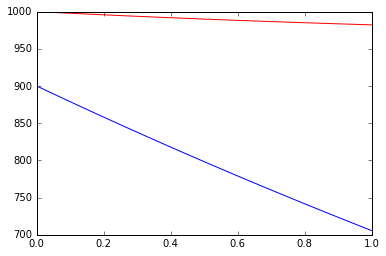

In [20]:
t0 = [1000,900,500]
t = np.linspace(0, 1.00, 100)
y = odeint(hivEffective, t0, t)


plt.figure(num=None, figsize=(12, 9), dpi=100, facecolor='w', edgecolor='k')

line1, = plt.plot(t, y[:, 1], 'b-', label='Infected T Cells')
line2, = plt.plot(t, y[:, 0], 'r-', label='Noninfected T Cells')

first_legend = plt.legend(handles=[line1], loc=4)
ax = plt.gca().add_artist(first_legend)
plt.legend(handles=[line2], loc=1)
plt.xlabel('time ')
plt.ylabel('Concentration')
plt.title('CD4+ T Cell Population')

## Latently Infected and Actively Infected CD4+ T Cells

Taken from Parelson et al. (Dynamics of HIV Infection of DC4+ T Cells, 1992)

$ T $ = concentration of uninfected CD4+ T Cells

$ T^* $ = concentration of latently infected CD4+ T cells

$ T^{**} $ = concentration of actively infected CD4+ T cells

$ V $ = concentration of HIV virus

$$ \frac{dT}{dt} = s + pT (1 - \frac{T}{T_{max}}) - \mu_T T - k_1VT $$

$$ \frac{dT^*}{dt} = k_1VT - \mu_T T^* - k_2 T^* $$

$$ \frac{dT^{**}}{dt} = k_2T^* - \mu_b T^{**}$$


$$ \frac{dV}{dt} = N \mu_b T^{**} -k_1VT - \mu_v V$$

In [21]:
s = 10
r = 0.03
tMax =  1500
mu_t = 0.04
mu_b = 0.24
mu_v = 2.4

k_1 = 2.4* math.pow(10, -5)
k_2 = 3* math.pow(10 ,-3)
N = 10

In [22]:
def hivInfection(F, t):
    Dt = s - mu_t * F[0] + p * F[0] * (1 - (F[0] + F[1] + F[2] ) / tMax) - k_1 * F[3] * F[0]
    Dt_star = k_1 * F[3] * F[0] - mu_t * F[1] - k_2 * F[1]
    Dt_doubleStar = k_2 * F[0] - mu_b * F[2]
    Dv = N * mu_b * F[2] - k_1 * F[3] * F[0] - mu_v * F[3]
    
    return [Dt, Dt_star, Dt_doubleStar, Dv]

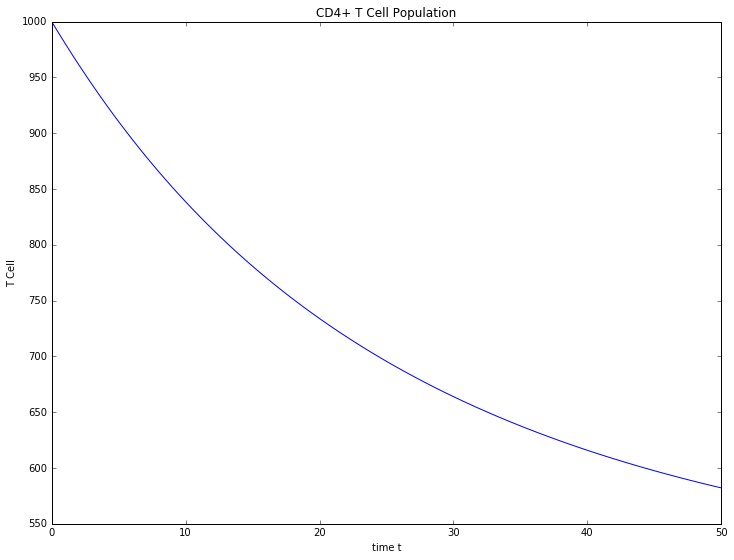

In [50]:
t0 = [1000, 0, 0, 0.0001]
t = np.linspace(0, 50, 100)
y = odeint(hivInfection, t0, t)

plt.figure(num=None, figsize=(12, 9), dpi=100, facecolor='w', edgecolor='k')
plt.plot(t, y[:, 0], 'b-')

plt.xlabel('time t')
plt.ylabel('T Cell')
plt.title('CD4+ T Cell Population')


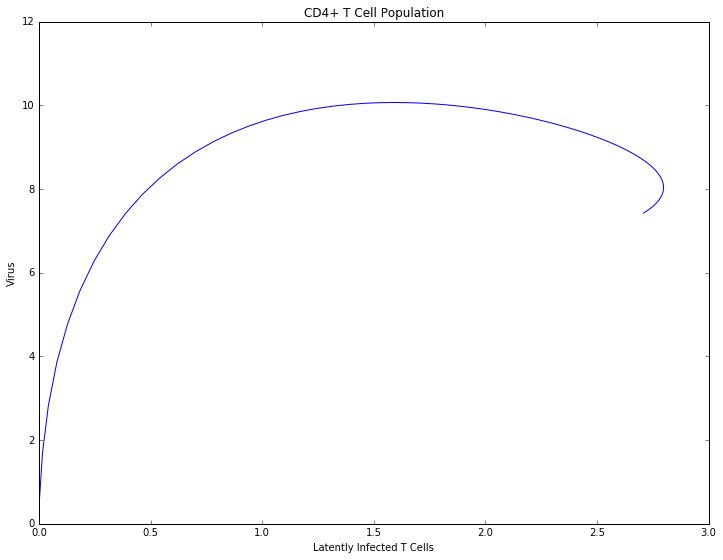

In [51]:
plt.figure(num=None, figsize=(12, 9), dpi=100, facecolor='w', edgecolor='k')

plt.xlabel('Latently Infected T Cells')
plt.ylabel('Virus')
plt.title('CD4+ T Cell Population')

plt.plot(y[:,1], y[:,3], 'b-')